###Electric Vehicle Data Analysis Project
####Project Overview
In this project, we will analyze a dataset related to electric vehicles (EVs). The dataset contains various features such as electric range, energy consumption, price, and other relevant attributes. our goal is to conduct a thorough analysis to uncover meaningful insights, tell a compelling story, conduct hypothesis testing and provide actionable recommendations based on the data.

####Dataset:
[FEV-data-Excel.xlsx](https://docs.google.com/spreadsheets/d/17I47pSX87vzBwrJGZvNMNdVv_Jg5pHI9/edit?gid=1403427075#gid=1403427075)

In [ ]:
# import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import warnings
warnings.filterwarnings('ignore')

In [ ]:
url = 'https://docs.google.com/spreadsheets/d/17I47pSX87vzBwrJGZvNMNdVv_Jg5pHI9/export?format=csv&gid=1403427075'
df = pd.read_csv(url)
# Disply the few rows of dataset
df.head(5)

,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
0,Audi e-tron 55 quattro,Audi,e-tron 55 quattro,345700,360,664,disc (front + rear),4WD,95.0,438,...,3130.0,640.0,5,5,19,200,660.0,5.7,150,24.45
1,Audi e-tron 50 quattro,Audi,e-tron 50 quattro,308400,313,540,disc (front + rear),4WD,71.0,340,...,3040.0,670.0,5,5,19,190,660.0,6.8,150,23.80
2,Audi e-tron S quattro,Audi,e-tron S quattro,414900,503,973,disc (front + rear),4WD,95.0,364,...,3130.0,565.0,5,5,20,210,660.0,4.5,150,27.55
3,Audi e-tron Sportback 50 quattro,Audi,e-tron Sportback 50 quattro,319700,313,540,disc (front + rear),4WD,71.0,346,...,3040.0,640.0,5,5,19,190,615.0,6.8,150,23.30
4,Audi e-tron Sportback 55 quattro,Audi,e-tron Sportback 55 quattro,357000,360,664,disc (front + rear),4WD,95.0,447,...,3130.0,670.0,5,5,19,200,615.0,5.7,150,23.85


In [ ]:
# Dataframe structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 25 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Car full name                           53 non-null     object 
 1   Make                                    53 non-null     object 
 2   Model                                   53 non-null     object 
 3   Minimal price (gross) [PLN]             53 non-null     int64  
 4   Engine power [KM]                       53 non-null     int64  
 5   Maximum torque [Nm]                     53 non-null     int64  
 6   Type of brakes                          52 non-null     object 
 7   Drive type                              53 non-null     object 
 8   Battery capacity [kWh]                  53 non-null     float64
 9   Range (WLTP) [km]                       53 non-null     int64  
 10  Wheelbase [cm]                          53 non-null     float64


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isnull().sum()

,0
Car full name,0
Make,0
Model,0
Minimal price (gross) [PLN],0
Engine power [KM],0
Maximum torque [Nm],0
Type of brakes,1
Drive type,0
Battery capacity [kWh],0
Range (WLTP) [km],0


In [ ]:
#Seperate numeric columns
num_col = df.dtypes[df.dtypes!="object"].index
num_col

Index(['Minimal price (gross) [PLN]', 'Engine power [KM]',
       'Maximum torque [Nm]', 'Battery capacity [kWh]', 'Range (WLTP) [km]',
       'Wheelbase [cm]', 'Length [cm]', 'Width [cm]', 'Height [cm]',
       'Minimal empty weight [kg]', 'Permissable gross weight [kg]',
       'Maximum load capacity [kg]', 'Number of seats', 'Number of doors',
       'Tire size [in]', 'Maximum speed [kph]', 'Boot capacity (VDA) [l]',
       'Acceleration 0-100 kph [s]', 'Maximum DC charging power [kW]',
       'mean - Energy consumption [kWh/100 km]'],
      dtype='object')

In [ ]:
#Seperate categorical columns
cat_col = df.dtypes[df.dtypes=='object'].index
cat_col

Index(['Car full name', 'Make', 'Model', 'Type of brakes', 'Drive type'], dtype='object')

In [ ]:
df[pd.isnull(df['mean - Energy consumption [kWh/100 km]'])]

,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
9,Citroën ë-C4,Citroën,ë-C4,125000,136,260,disc (front + rear),2WD (front),50.0,350,...,2000.0,459.0,5,5,16,150,380.0,9.5,100,NaN
29,Peugeot e-2008,Peugeot,e-2008,149400,136,260,disc (front + rear),2WD (front),50.0,320,...,NaN,NaN,5,5,16,150,434.0,NaN,100,NaN
39,Tesla Model 3 Standard Range Plus,Tesla,Model 3 Standard Range Plus,195490,285,450,disc (front + rear),2WD (rear),54.0,430,...,NaN,NaN,5,5,18,225,425.0,5.6,150,NaN
40,Tesla Model 3 Long Range,Tesla,Model 3 Long Range,235490,372,510,disc (front + rear),4WD,75.0,580,...,NaN,NaN,5,5,18,233,425.0,4.4,150,NaN
41,Tesla Model 3 Performance,Tesla,Model 3 Performance,260490,480,639,disc (front + rear),4WD,75.0,567,...,NaN,NaN,5,5,20,261,425.0,3.3,150,NaN
42,Tesla Model S Long Range Plus,Tesla,Model S Long Range Plus,368990,525,755,disc (front + rear),4WD,100.0,652,...,NaN,NaN,5,5,19,250,745.0,3.8,150,NaN
43,Tesla Model S Performance,Tesla,Model S Performance,443990,772,1140,disc (front + rear),4WD,100.0,639,...,NaN,NaN,5,5,21,261,745.0,2.5,150,NaN
44,Tesla Model X Long Range Plus,Tesla,Model X Long Range Plus,407990,525,755,disc (front + rear),4WD,100.0,561,...,NaN,NaN,7,5,20,250,857.0,4.6,150,NaN
45,Tesla Model X Performance,Tesla,Model X Performance,482990,772,1140,disc (front + rear),4WD,100.0,548,...,NaN,NaN,7,5,20,261,857.0,2.8,150,NaN


majority of values missing from tesla model.

In [ ]:
# filling missing values for numeric column using median
for col in num_col:
  if df[col].isnull().sum() > 0:
    df[col].fillna(df[col].median(), inplace=True)

#fill missing value of categorical column
for col in cat_col:
  if df[col].isnull().sum() > 0:
    df[col].fillna(df[col].mode()[0],inplace=True)

df.isnull().sum()

,0
Car full name,0
Make,0
Model,0
Minimal price (gross) [PLN],0
Engine power [KM],0
Maximum torque [Nm],0
Type of brakes,0
Drive type,0
Battery capacity [kWh],0
Range (WLTP) [km],0


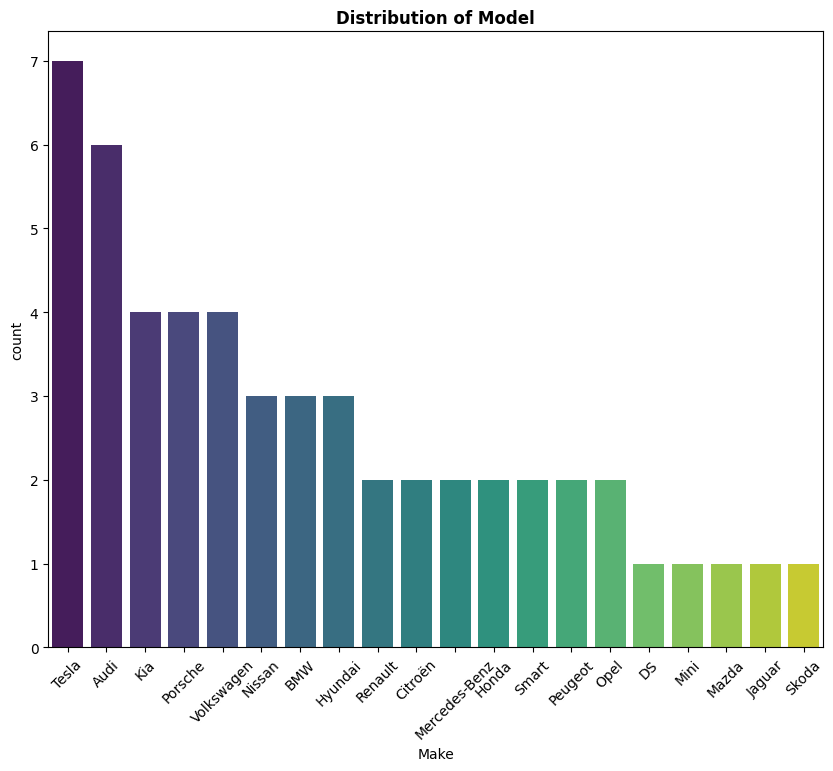

In [ ]:
# plotting for make column
plt.figure(figsize=(10,8))
sns.countplot(x=df['Make'], order=df['Make'].value_counts().index, palette='viridis')
plt.title('Distribution of Model', fontweight='bold')
plt.xticks(rotation=45)
plt.show()

####Task 1: A customer has a budget of 350,000 PLN and wants an EV with a minimum range of 400 km.
```
a) Your task is to filter out EVs that meet these criteria.
b) Group them by the manufacturer (Make).
c) Calculate the average battery capacity for each manufacturer.


In [ ]:
# filter EVs based on given criteria
filter_ev = df[(df['Minimal price (gross) [PLN]'] <= 350000) & (df['Range (WLTP) [km]'] >= 400)]

# Group by make and calculate the average battery capacity
result = filter_ev.groupby('Make')['Battery capacity [kWh]'].mean().reset_index()
#Display the result
result

,Make,Battery capacity [kWh]
0,Audi,95.000000
1,BMW,80.000000
2,Hyundai,64.000000
3,Kia,64.000000
4,Mercedes-Benz,80.000000
5,Tesla,68.000000
6,Volkswagen,70.666667


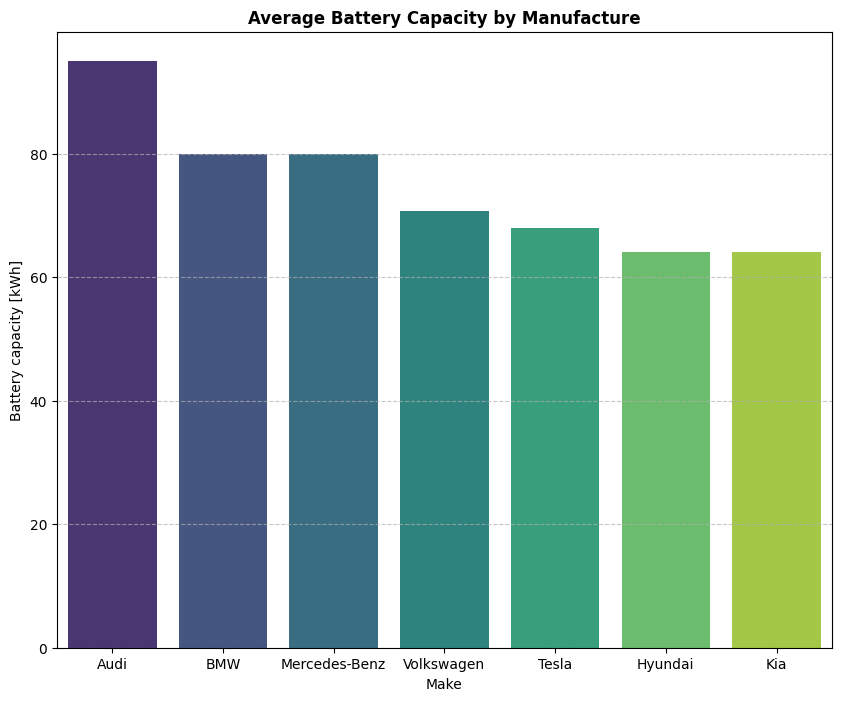

In [ ]:
result = result.sort_values('Battery capacity [kWh]',ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(x='Make', y='Battery capacity [kWh]', data=result,palette='viridis')
plt.title('Average Battery Capacity by Manufacture', fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

####Methodology:
####Filtering:
We filtered the dataset using the following conditions: Minimal price (gross) [PLN] ≤ 350,000 Range (WLTP) [km] ≥ 400

####Grouping:
After filtering, we grouped the remaining EVs by their manufacturer (Make).

####Aggregation:
For each manufacturer group, we calculated the average battery capacity using the column Battery capacity [kWh].

####Visualization:
A bar chart was created to visualize the average battery capacity per manufacturer.

####Graph
The bar chart shows that Audi leads with the highest average battery capacity.

####Conclusion:
Manufacturers differ in how they balance cost, battery capacity, and range. This analysis helps customers identify which brands provide the best value within a defined budget, particularly if battery capacity is a priority.

####Task 2: You suspect some EVs have unusually high or low energy consumption.
Find the outliers in the mean - Energy consumption [kWh/100 km] column.

In [ ]:
# Rename the columns for easier reference
df = df.rename(columns={'mean - Energy consumption [kWh/100 km]':'energy_consumption'})

In [ ]:
# Calculate Q1 and Q3
Q1 = df['energy_consumption'].quantile(0.25)
Q3 = df['energy_consumption'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Determine outliers
lb = (Q1 - 1.5 * IQR)
ub = (Q3 + 1.5 * IQR)

# Find Outliers
outliers = df[(df['energy_consumption'] < lb) | (df['energy_consumption'] > ub)]
print(outliers)

Empty DataFrame
Columns: [Car full name, Make, Model, Minimal price (gross) [PLN], Engine power [KM], Maximum torque [Nm], Type of brakes, Drive type, Battery capacity [kWh], Range (WLTP) [km], Wheelbase [cm], Length [cm], Width [cm], Height [cm], Minimal empty weight [kg], Permissable gross weight [kg], Maximum load capacity [kg], Number of seats, Number of doors, Tire size [in], Maximum speed [kph], Boot capacity (VDA) [l], Acceleration 0-100 kph [s], Maximum DC charging power [kW], energy_consumption]
Index: []

[0 rows x 25 columns]


In [ ]:
# Displaying IQR and bonds
print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")
print(f"Lower Bond: {lb}")
print(f"Upper Bond: {ub}")

Q1: 15.9
Q3: 21.85
IQR: 5.950000000000001
Lower Bond: 6.975
Upper Bond: 30.775000000000002


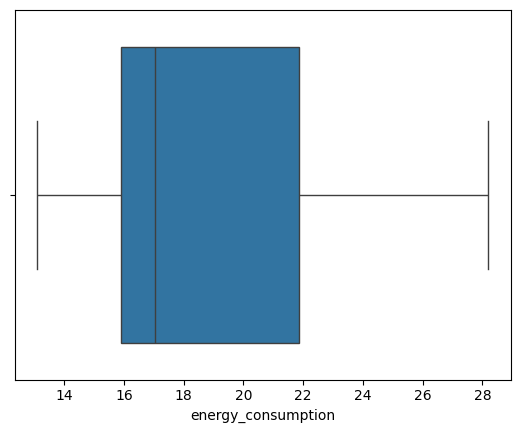

In [ ]:
# boxplot of energy_consumption
sns.boxplot(x=df['energy_consumption'])
plt.show()

####Methodology:
For easier readability and coding, the original column name was renamed to Energy Consumption.

To detect outliers, we used the Interquartile Range (IQR) method: Calculated the first (Q1) and third quartiles (Q3) of the Energy Consumption column.

Computed the IQR as Q3 - Q1.

Defined outlier bounds using the standard formula:

Lower bound = Q1 - 1.5 × IQR Upper bound = Q3 + 1.5 × IQR

EVs with energy consumption values outside these bounds were flagged as outliers. After applying the IQR method:

No statistical outliers were detected in the dataset. All EVs had energy consumption values within the range of approximately 6.97 to 30.78 kWh/100 km, which falls within the expected range for modern EVs.

####Conclusion:
The dataset appears to be well-curated with no extreme anomalies in energy usage. This suggests:

Consistent vehicle design across models,

No major data entry errors in this column,

And that most EVs operate within a reasonable efficiency range.

####Task 3: Your manager wants to know if there's a strong relationship between battery capacity and range.
```
a) Create a suitable plot to visualize.
b) Highlight any insights


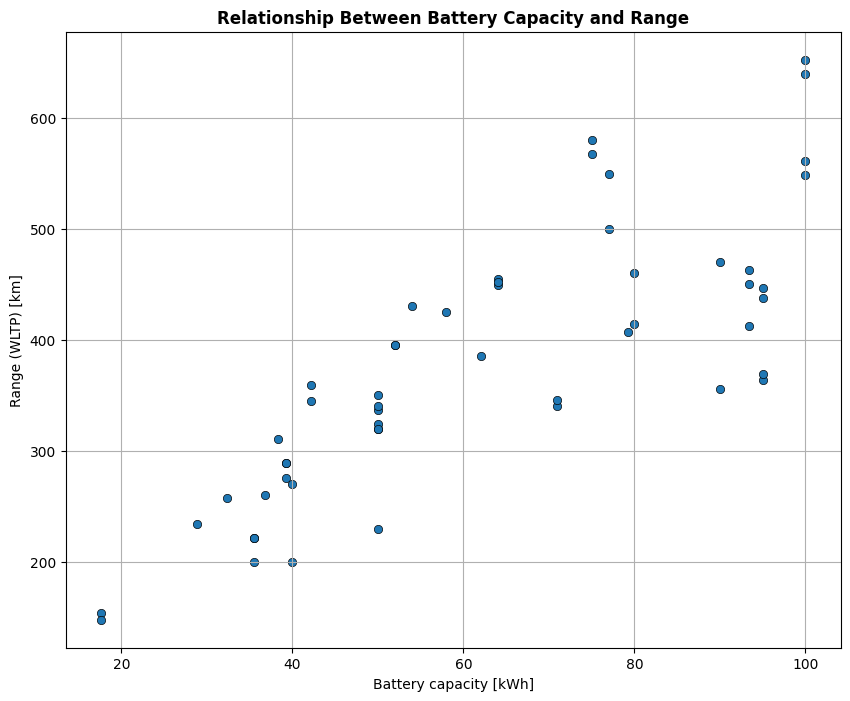

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Battery capacity [kWh]', y='Range (WLTP) [km]',data=df,edgecolors='k')
plt.title('Relationship Between Battery Capacity and Range', fontweight='bold')
plt.grid(True)
plt.show()

####a). Visualization:
A scatter plot was used to visualize the relationship between battery capacity and range. Each point on the graph represents an Electric Vehicle, with:

X-axis: Battery capacity [kWh]
Y-axis: Range (WLTP) [km]
####b). Highlight & insights.
Positive Trend: The plot shows a general upward trend, indicating that as battery capacity increases, the range tends to increase as well. This suggests a positive correlation between the two variables.

Strength of the Relationship: --> While the relationship is generally positive, it’s not perfectly linear—some EVs with similar battery capacities have noticeably different ranges. --> This variance might be influenced by other factors like energy efficiency, vehicle weight, Engine Power, Driving ondition.

Outliers: Some cars in the graph are far away from most of the other points. This means they behave differently from the rest. For example, a few cars with around 100 kWh battery capacity can go much farther than others with the same battery size.

This might be because they use energy more efficiently, or they’re built in a way that helps them go farther on the same amount of power.

####Conclusion:
There is a strong positive relationship between battery capacity and range, which aligns with expectations—larger batteries generally store more energy and enable longer driving distances

####Task 4: Build an EV recommendation class.
The class should allow users to input their budget, desired range, and battery capacity. The class should then return the top three EVs matching their criteria.

In [ ]:
class evrecommendation():
  def __init__(self,df):
    self.df = df

  def recommendation(self,budget,desired_range,battery_capacity):
    # apply filtered
    filtered = self.df[
        (self.df['Minimal price (gross) [PLN]'] <= budget) &
        (self.df['Range (WLTP) [km]'] >= desired_range) &
        (self.df['Battery capacity [kWh]'] >= battery_capacity)
      ]
    filtered = filtered.sort_values(by='Minimal price (gross) [PLN]')
    return filtered.head(3)

In [ ]:
# Create recommender object
recommender = evrecommendation(df)

budget = int(input("Enter the budget: "))
desired_range = int(input("Enter the range: "))
battery_capacity = int(input("Enter the battery capacity: "))

top_matches = recommender.recommendation(budget, desired_range, battery_capacity)

# Display results
print("Top EV Recommendations:\n")
print(top_matches[['Car full name', 'Minimal price (gross) [PLN]', 'Range (WLTP) [km]', 'Battery capacity [kWh]']])

Enter the budget: 350000
Enter the range: 400
Enter the battery capacity: 80
Top EV Recommendations:

             Car full name  Minimal price (gross) [PLN]  Range (WLTP) [km]  \
8                  BMW iX3                       282900                460   
22       Mercedes-Benz EQC                       334700                414   
0   Audi e-tron 55 quattro                       345700                438   

    Battery capacity [kWh]  
8                     80.0  
22                    80.0  
0                     95.0  


In this task, I developed an EV recommendation system using a Python class named evrecommendation. The purpose of this class is to help users find the most suitable electric vehicles (EVs) based on their personal preferences.

####Task 5: Inferential Statistics – Hypothesis Testing:
Test whether there is a significant difference in the average Engine power [KM] of vehicles manufactured by two leading manufacturers i.e. Tesla and Audi. What insights can you draw from the test results? Recommendations and Conclusion: Provide actionable insights based on your analysis. (Conduct a two sample t-test using ttest_ind from scipy.stats module)

In [ ]:
# filter the data from tesla and audi
tesla_power = df[df['Make'] == 'Tesla']['Engine power [KM]']
audi_power = df[df['Make'] == 'Audi']['Engine power [KM]']

# perform two sample t-test
t_state, p_value = ttest_ind(tesla_power, audi_power, equal_var= False)
#Print the result
print("T-statistic:", round(t_state,3))
print("P-value:", round(p_value,3))

T-statistic: 1.794
P-value: 0.107


In [ ]:
# report format
alpha = 0.05 # significance level
if p_value < alpha:
    print("Significant difference in engine power between Tesla and Audi.")
else:
    print("No significant difference in engine power between Tesla and Audi.")

No significant difference in engine power between Tesla and Audi.


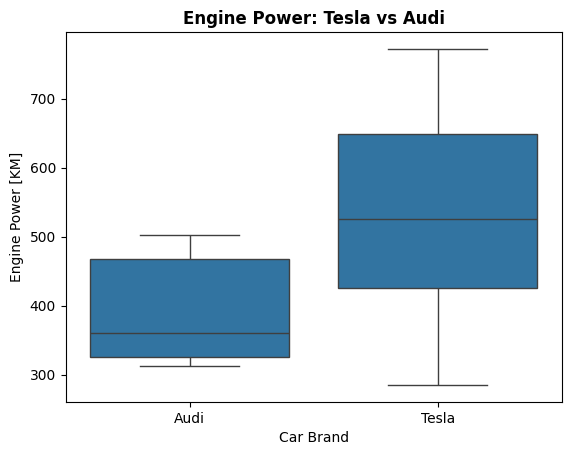

In [ ]:
#filter only tesla and audi rows
subset = df[df['Make'].isin(['Tesla','Audi'])]

#plotting the box plot
sns.boxplot(x='Make',y='Engine power [KM]', data=subset)
plt.title('Engine Power: Tesla vs Audi', fontweight='bold')
plt.xlabel('Car Brand')
plt.ylabel('Engine Power [KM]')
plt.show()

####Method:
We conducted a two-sample independent t-test using ttest_ind from scipy.stats. The comparison was made using the Engine power [KM] column for both Tesla and Audi EVs.

####Hypotheses:
Null Hypothesis (H₀): Tesla and Audi EVs have similar average engine power. Alternative Hypothesis (H₁): Tesla and Audi EVs have different average engine power.

####Results:
T-statistic: 1.794 P-value: 0.107 Significance level (α): 0.05

Since the p-value (0.107) is greater than 0.05, we fail to reject the null hypothesis. This means there is no statistically significant difference in average engine power between Tesla and Audi EVs based on the data.

####Conclusion:
While the data sample graph shows Tesla vehicles appear to have higher engine power than Audi, the statistical test (p = 0.107) shows that this difference is not statistically significant. Therefore, we cannot confidently say there is a real difference in average engine power based on this data.